# 206052K - K.B.S.Karunarathna
## Text Analytics DA4210
##  Real-World Text Analytics Application


## **Visitor Sentiment Analysis Across Disneyland Parks: A Comparative Study of Reviews of Disneyland from Paris, California, and Hong Kong**

### Data Collection

Kaggle dataset on 'Disneyland Reviews':

The data frame is a collection of reviews by visitors of 3 Disneyland parks namely, Paris, California and Hong Kong, posted on Trip Advisor.

"How do visitors perceive the Disneyland brand across different regions and parks, and what factors influence their sentiment towards the brand?"

In [4]:
# Import necessary libraries
import pandas as pd

file_path = '/content/DisneylandReviews.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the DataFrame
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
print('Disneyland Reviews Data Set Shape = {}'.format(df.shape))

Disneyland Reviews Data Set Shape = (42656, 6)


### Data Preprocessing



**1. Normalize Contractions:**

Tokenizing the text before addressing contractions like "you've" or "wasn't" may result in incorrect tokenization, as these contractions will be split into multiple tokens. To address this issue, it's better to normalize contractions early in the preprocessing pipeline, before tokenization.

In [6]:
import re

# Function to Normalize Contractions
def normalize_contractions(text):
  if isinstance(text, str):
        # Define contraction mappings
        contractions = {
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "haven't": "have not",
        "hasn't": "has not",
        "hadn't": "had not",
        "won't": "will not",
        "wouldn't": "would not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "can't": "cannot",
        "couldn't": "could not",
        "shouldn't": "should not",
        "mightn't": "might not",
        "mustn't": "must not",
        "i'm": "i am",
        "you're": "you are",
        "he's": "he is",
        "she's": "she is",
        "it's": "it is",
        "it's": "it has",
        "we're": "we are",
        "they're": "they are",
        "i'll": "i will",
        "you'll": "you will",
        "he'll": "he will",
        "she'll": "she will",
        "it'll": "it will",
        "we'll": "we will",
        "they'll": "they will",
        "i'd": "i would",
        "you'd": "you would",
        "he'd": "he would",
        "she'd": "she would",
        "it'd": "it would",
        "we'd": "we would",
        "they'd": "they would",
        "i've": "i have",
        "you've": "you have",
        "we've": "we have",
        "they've": "they have",
        "should've": "should have",
        "would've": "would have",
        "could've": "could have",
        "might've": "might have",
        "must've": "must have",
        }

        # Initialize the normalized text
        normalized_text = text

        # Replace contractions with their expanded forms
        for contraction, expansion in contractions.items():
            normalized_text = re.sub(r'\b' + re.escape(contraction) + r'\b', expansion, normalized_text)

        return normalized_text
  else:
        return text

# Apply normalization function to the 'Review_Text' column
df['Normalized_Contractions'] = df['Review_Text'].apply(normalize_contractions)

df[['Review_Text', 'Normalized_Contractions']].head()

,Review_Text,Normalized_Contractions
0,If you've ever been to Disneyland anywhere you...,If you have ever been to Disneyland anywhere y...
1,Its been a while since d last time we visit HK...,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1...","the location is not in the city, took around 1..."


2. **Normalization of Abbreviations and Acronyms**:

In [7]:
# Dictionary of abbreviations and their expanded forms
abbreviations = {
    'HK': 'HongKong',
    'HKDL' : 'Hong Kong Disneyland',
    'HKD' : 'HongKong Dollar',
    'USD' : 'United States Dollar',
    'MTR': 'Mass Transit Railway ',
    'WDW': 'Walt Disney World',
    'DL' : 'Disneyland',
    'LA' : 'Los Angeles',
    'CTS' : 'China Travel Service',
    'USA' : 'United States of America'
}

# Function to Normalize Abbreviations and Acronyms
def normalize_abbreviations(text):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(key) for key in abbreviations.keys()))

    # Function to replace abbreviations with their expanded forms
    def replace(match):
        return abbreviations[match.group(0)]

    # Apply the replacement function to the text
    normalized_text = re.sub(pattern, replace, text)

    return normalized_text

# Apply normalization function to the 'Normalized_Contractions' column
df['Normalized_Abbreviations'] = df['Normalized_Contractions'].apply(normalize_abbreviations)

In [8]:
# Display few rows of the DataFrame with normalized abbreviations
df.iloc[9]['Normalized_Contractions']

"I can go on talking about Disneyland. Whatever I say about it, is less. Disneyland is all about your childhood dreams come true. Starting from the Entrance, the environment, popcorn, the shows, everything. Even the MTR Trains and the station is specially designed. In my opinion one should by a Two Day Ticket to explore it well if you have time. Else few of the attractions may remain incomplete in one day. An online Two Day Ticket can save around HKD 100 in comparison to an on spot ticket.  Must NOT Miss  attractions include the Jungle River Cruise, Micky's Phillhar Magic (a 4D Show), The Lion King ShowIt is better to have some home work regarding the Show Timings so that you can maximise the number of shows you can cover. It is better to avoid Sundays or the public holidays to avoid rush."

In [9]:
df.iloc[9]['Normalized_Abbreviations']

"I can go on talking about Disneyland. Whatever I say about it, is less. Disneyland is all about your childhood dreams come true. Starting from the Entrance, the environment, popcorn, the shows, everything. Even the Mass Transit Railway  Trains and the station is specially designed. In my opinion one should by a Two Day Ticket to explore it well if you have time. Else few of the attractions may remain incomplete in one day. An online Two Day Ticket can save around HongKong Dollar 100 in comparison to an on spot ticket.  Must NOT Miss  attractions include the Jungle River Cruise, Micky's Phillhar Magic (a 4D Show), The Lion King ShowIt is better to have some home work regarding the Show Timings so that you can maximise the number of shows you can cover. It is better to avoid Sundays or the public holidays to avoid rush."

3. **Chat Words Conversion**:

In [10]:
# Chat words string
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

# Split chat words string into lines and then into key-value pairs
chat_words_list = [line.split('=') for line in chat_words_str.strip().split('\n')]
chat_words_dict = {key.strip(): value.strip() for key, value in chat_words_list}

# Function to replace chat words with their expansions
def replace_chat_words(text):
    for word in text.split():
        if word.upper() in chat_words_dict:
            text = text.replace(word, chat_words_dict[word.upper()])
    return text

# Apply the function to replace chat words in the 'Normalized_Abbreviations' column
df['Chat_Words_Converted'] = df['Normalized_Abbreviations'].apply(replace_chat_words)

In [11]:
# Display few rows of the DataFrame with normalized abbreviations
df.iloc[1579]['Normalized_Abbreviations']

'We had a good time in Disneyland     WHO DOESNT ; ).. it was all decked up for the holiday season.. The rides were all suited for kids and my 5 year old loved the Ironman exhibit and the 4D show (we did that twice).. and so also the grizzly roller coaster ride. The rides here have a smaller height requirement and most of the rides can be done by kids.. Over the day the park sure gets crowded although we went on a weekday to beat the crowd.. I recommend that study the park before you go.. and identify the rides you want to take FOR SURE types so that you get to them ASAP and avoid long queues.For example by the end of the day the Carousel queues were really long and we skipped that.. You can consider getting fast pass too.. (we didnt).DONT MISS the Disney parade that happens at 3PM or the time they keep announcing.. And the highlight for us was the night parade.. This was the first time we were seeing it (don   t remember seeing it in Paris or US) and we were floored with it.. Its some

In [12]:
df.iloc[1579]['Chat_Words_Converted']

'We had a good time in Disneyland     WHO DOESNT ; ).. it was all decked up for the holiday season.. The rides were all suited for kids and my 5 year old loved the Ironman exhibit and the 4D show (we did that twice).. and so also the grizzly roller coaster ride. The rides here have a smaller height requirement and most of the rides can be done by kids.. Over the day the park sure gets crowded although we went on a weekday to beat the crowd.. I recommend that study the park before you go.. and identify the rides you want to take FOR SURE types so that you get to them As Soon As Possible and avoid long queues.For example by the end of the day the Carousel queues were really long and we skipped that.. You can consider getting fast pass too.. (we didnt).DONT MISS the Disney parade that happens at 3PM or the time they keep announcing.. And the highlight for us was the night parade.. This was the first time we were seeing it (don   t remember seeing it in Paris or US) and we were floored wit

4. **Conversion of Emoticon to Words**:

Retaining emoticons rather than removing them is crucial because emoticons represent insightful information in the sentiment analysis. Therefore, for emoticons like ":)" to be retained and treated as single tokens during tokenization, it's a good idea to convert them into words or special tokens before tokenizing the text.

This ensures that emoticons are preserved as entities rather than being removed or split into individual characters during tokenization. Hence they are converted to words and then can be tokenized the text at the word level.

There were no emojis found in the data frame.

In [13]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [14]:
# Define a function to replace emoticons with words
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

# Apply the function to the 'Normalized_Contractions' column in the DataFrame
df['Convert_Emoticons'] = df['Chat_Words_Converted'].apply(convert_emoticons)

In [15]:
# Display few rows of the DataFrame with replaced emoticons
df.iloc[314]['Chat_Words_Converted']

'Disneyland Hong Kong is smaller than Los Angeles and Disneyworld parks in Florida but it made for an enjoyable day.The Mass Transit Railway  train   which takes you right to Disneyland   is easy, fast and affordable.The only complaint from my husband is that there were no donuts!!!!! :)'

In [16]:
df.iloc[314]['Convert_Emoticons']

'Disneyland Hong Kong is smaller than Los Angeles and Disneyworld parks in Florida but it made for an enjoyable day.The Mass Transit Railway  train   which takes you right to Disneyland   is easy, fast and affordable.The only complaint from my husband is that there were no donuts!!!!! Happy_face_or_smiley'

In [17]:
df.iloc[1404]['Chat_Words_Converted']

'Got 2 days ticket, we visit 25Jun2017 and 28Jun2017. At that moment we feel very hot. Sunshine so bright, no cloud and soo hot.Everything were so fun for our children, and we mostly sure all the attraction can not finish just only one day.  Good attraction  Have to enjoy all the attraction, except roller coaster :)  Best to see is the parade and fireworks at the evening  Very hot at summer  In most cases, restaurant and food quite expensive  Long queue in every attraction, but use express ticket much better'

In [18]:
df.iloc[1404]['Convert_Emoticons']

'Got 2 days ticket, we visit 25Jun2017 and 28Jun2017. At that moment we feel very hot. Sunshine so bright, no cloud and soo hot.Everything were so fun for our children, and we mostly sure all the attraction can not finish just only one day.  Good attraction  Have to enjoy all the attraction, except roller coaster Happy_face_or_smiley  Best to see is the parade and fireworks at the evening  Very hot at summer  In most cases, restaurant and food quite expensive  Long queue in every attraction, but use express ticket much better'

**5. Handling Numerals:**

To keep numerals in the reviews, it's generally better to do so before tokenization. This way, the numbers will be treated as separate tokens during tokenization and preserved as individual entities in the text data.

If we tokenize the text first and then decide to keep numerals, they might get split into individual characters during tokenization, especially when using word-level tokenization techniques. This could lead to losing the semantic meaning of the numbers.

So, to ensure that numerals are preserved as separate entities in  text data, it's recommended to handle them before tokenization.

In [19]:
# Function to keep numerals in the text
def keep_numerals(text):
    pattern = r'\b\d+\b'

    # Replace numerals with themselves
    return re.sub(pattern, lambda x: x.group(), text)

# Apply the function to the 'Convert_Emoticons' column
df['Numerals_Text'] = df['Convert_Emoticons'].apply(keep_numerals)

In [20]:
# Display few rows of the DataFrame with replaced emoticons
df.iloc[1579]['Convert_Emoticons']

'We had a good time in Disneyland     WHO DOESNT ; Confusion.. it was all decked up for the holiday season.. The rides were all suited for kids and my 5 year old loved the Ironman exhibit and the 4D show (we did that twiceConfusion.. and so also the grizzly roller coaster ride. The rides here have a smaller height requirement and most of the rides can be done by kids.. Over the day the park sure gets crowded although we went on a weekday to beat the crowd.. I recommend that study the park before you go.. and identify the rides you want to take FOR SURE types so that you get to them As Soon As Possible and avoid long queues.For example by the end of the day the Carousel queues were really long and we skipped that.. You can consider getting fast pass too.. (we didntConfusion.DONT MISS the Disney parade that happens at 3PM or the time they keep announcing.. And the highlight for us was the night parade.. This was the first time we were seeing it (don   t remember seeing it in Paris or USC

In [21]:
df.iloc[1579]['Numerals_Text']

'We had a good time in Disneyland     WHO DOESNT ; Confusion.. it was all decked up for the holiday season.. The rides were all suited for kids and my 5 year old loved the Ironman exhibit and the 4D show (we did that twiceConfusion.. and so also the grizzly roller coaster ride. The rides here have a smaller height requirement and most of the rides can be done by kids.. Over the day the park sure gets crowded although we went on a weekday to beat the crowd.. I recommend that study the park before you go.. and identify the rides you want to take FOR SURE types so that you get to them As Soon As Possible and avoid long queues.For example by the end of the day the Carousel queues were really long and we skipped that.. You can consider getting fast pass too.. (we didntConfusion.DONT MISS the Disney parade that happens at 3PM or the time they keep announcing.. And the highlight for us was the night parade.. This was the first time we were seeing it (don   t remember seeing it in Paris or USC

**6. Tokenization:**

In [22]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already downloaded
nltk.download('punkt')

# Function to tokenize text at the word level
def tokenize_text(text):
        # Tokenize the text into words
        tokens = word_tokenize(text)
        return tokens

# Apply tokenization to the 'Numerals_Text' column in the dataframe
df['Tokenized_Text'] = df['Numerals_Text'].apply(tokenize_text)

# Display the first few rows of the dataframe with tokenized text
df[['Numerals_Text', 'Tokenized_Text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Numerals_Text,Tokenized_Text
0,If you have ever been to Disneyland anywhere y...,"[If, you, have, ever, been, to, Disneyland, an..."
1,Its been a while since d last time we visit Ho...,"[Its, been, a, while, since, d, last, time, we..."
2,Thanks God it wasn t too hot or too humid wh...,"[Thanks, God, it, wasn, t, too, hot, or, too, ..."
3,HongKong Disneyland is a great compact park. U...,"[HongKong, Disneyland, is, a, great, compact, ..."
4,"the location is not in the city, took around 1...","[the, location, is, not, in, the, city, ,, too..."


7. **Lowercasing**:

In [24]:
# Function to lowercase the tokenized text
def lowercase_text(tokens):
    return [token.lower() for token in tokens]

# Apply lowercase function to the 'Tokenized_Text' column
df['Lower_Text'] = df['Tokenized_Text'].apply(lowercase_text)

# Display the first few rows of the dataframe with lowercase tokenized text
df[['Tokenized_Text', 'Lower_Text']].head()

,Tokenized_Text,Lower_Text
0,"[If, you, have, ever, been, to, Disneyland, an...","[if, you, have, ever, been, to, disneyland, an..."
1,"[Its, been, a, while, since, d, last, time, we...","[its, been, a, while, since, d, last, time, we..."
2,"[Thanks, God, it, wasn, t, too, hot, or, too, ...","[thanks, god, it, wasn, t, too, hot, or, too, ..."
3,"[HongKong, Disneyland, is, a, great, compact, ...","[hongkong, disneyland, is, a, great, compact, ..."
4,"[the, location, is, not, in, the, city, ,, too...","[the, location, is, not, in, the, city, ,, too..."


8. **Removal of Punctuations and Special Characters**:

In [25]:
import string

# Define the punctuation to remove
PUNCT_TO_REMOVE = string.punctuation

# Function to remove punctuation from tokenized Lower_Text
def remove_punctuation(tokens):
    return [token.translate(str.maketrans('', '', PUNCT_TO_REMOVE)) for token in tokens]

# Apply the function to remove punctuation to the 'Lower_Text' column
df['No_Punctuation_Text'] = df['Lower_Text'].apply(remove_punctuation)

In [26]:
# Display few rows of the dataframe with removed punctuation
df.iloc[0]['Lower_Text']

['if',
 'you',
 'have',
 'ever',
 'been',
 'to',
 'disneyland',
 'anywhere',
 'you',
 'will',
 'find',
 'disneyland',
 'hong',
 'kong',
 'very',
 'similar',
 'in',
 'the',
 'layout',
 'when',
 'you',
 'walk',
 'into',
 'main',
 'street',
 '!',
 'it',
 'has',
 'a',
 'very',
 'familiar',
 'feel',
 '.',
 'one',
 'of',
 'the',
 'rides',
 'its',
 'a',
 'small',
 'world',
 'is',
 'absolutely',
 'fabulous',
 'and',
 'worth',
 'doing',
 '.',
 'the',
 'day',
 'we',
 'visited',
 'was',
 'fairly',
 'hot',
 'and',
 'relatively',
 'busy',
 'but',
 'the',
 'queues',
 'moved',
 'fairly',
 'well',
 '.']

In [27]:
df.iloc[0]['No_Punctuation_Text']

['if',
 'you',
 'have',
 'ever',
 'been',
 'to',
 'disneyland',
 'anywhere',
 'you',
 'will',
 'find',
 'disneyland',
 'hong',
 'kong',
 'very',
 'similar',
 'in',
 'the',
 'layout',
 'when',
 'you',
 'walk',
 'into',
 'main',
 'street',
 '',
 'it',
 'has',
 'a',
 'very',
 'familiar',
 'feel',
 '',
 'one',
 'of',
 'the',
 'rides',
 'its',
 'a',
 'small',
 'world',
 'is',
 'absolutely',
 'fabulous',
 'and',
 'worth',
 'doing',
 '',
 'the',
 'day',
 'we',
 'visited',
 'was',
 'fairly',
 'hot',
 'and',
 'relatively',
 'busy',
 'but',
 'the',
 'queues',
 'moved',
 'fairly',
 'well',
 '']

**9. Normalize White Space:**



In [28]:
# Function to apply Whitespace Normalization
def normalize_whitespace(tokens):
    return [re.sub(r'\s+', ' ', token) for token in tokens]

# Apply normalization function to the 'No_Punctuation_Text' column
df['Normalized_Whitespace'] = df['No_Punctuation_Text'].apply(normalize_whitespace)

df[['No_Punctuation_Text', 'Normalized_Whitespace']].head()

,No_Punctuation_Text,Normalized_Whitespace
0,"[if, you, have, ever, been, to, disneyland, an...","[if, you, have, ever, been, to, disneyland, an..."
1,"[its, been, a, while, since, d, last, time, we...","[its, been, a, while, since, d, last, time, we..."
2,"[thanks, god, it, wasn, t, too, hot, or, too, ...","[thanks, god, it, wasn, t, too, hot, or, too, ..."
3,"[hongkong, disneyland, is, a, great, compact, ...","[hongkong, disneyland, is, a, great, compact, ..."
4,"[the, location, is, not, in, the, city, , took...","[the, location, is, not, in, the, city, , took..."


**10. Removal of Stop words:**

stopwords (common words like "the," "is," "and" which do not contribute much to the meaning)  



In [29]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Define stopwords
STOPWORDS = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in STOPWORDS]

# Apply the function to remove stopwords to the 'Normalized_Whitespace' column
df['No_Stopwords_Text'] = df['Normalized_Whitespace'].apply(remove_stopwords)

df[['Normalized_Whitespace', 'No_Stopwords_Text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Normalized_Whitespace,No_Stopwords_Text
0,"[if, you, have, ever, been, to, disneyland, an...","[ever, disneyland, anywhere, find, disneyland,..."
1,"[its, been, a, while, since, d, last, time, we...","[since, last, time, visit, hongkong, disneylan..."
2,"[thanks, god, it, wasn, t, too, hot, or, too, ...","[thanks, god, hot, humid, visiting, park, othe..."
3,"[hongkong, disneyland, is, a, great, compact, ...","[hongkong, disneyland, great, compact, park, ,..."
4,"[the, location, is, not, in, the, city, , took...","[location, city, , took, around, 1, hour, kowl..."


**11. Removal of Frequent words, and  Rare words:**

In [30]:
from collections import Counter

cnt = Counter()
for tokens in df["No_Stopwords_Text"].values:
    cnt.update(tokens)

# Get the most common tokens
most_common_tokens = cnt.most_common(50)
most_common_tokens

[('', 548358),
 ('park', 44378),
 ('disney', 37531),
 ('rides', 34342),
 ('disneyland', 33524),
 ('time', 29199),
 ('day', 28152),
 ('get', 23042),
 ('go', 20155),
 ('one', 19143),
 ('ride', 17599),
 ('great', 16415),
 ('would', 16263),
 ('food', 14191),
 ('kids', 14044),
 ('place', 13437),
 ('good', 13073),
 ('really', 12387),
 ('like', 11949),
 ('visit', 11713),
 ('see', 11704),
 ('went', 11303),
 ('much', 11151),
 ('people', 11054),
 ('also', 10396),
 ('long', 10228),
 ('fast', 10050),
 ('back', 10047),
 ('us', 9886),
 ('fun', 9785),
 ('parks', 9723),
 ('pass', 9716),
 ('wait', 9625),
 ('even', 9454),
 ('2', 9226),
 ('first', 9106),
 ('many', 8949),
 ('experience', 8832),
 ('world', 8831),
 ('around', 8803),
 ('times', 8741),
 ('days', 8662),
 ('could', 8495),
 ('show', 8481),
 ('parade', 8433),
 ('well', 8393),
 ('year', 8059),
 ('still', 7945),
 ('staff', 7866),
 ('children', 7856)]

Sentiment Analysis: In a dataset about Disneyland reviews, words like "rides," "food," "kids," "fast," "wait," etc., could be crucial for understanding the overall sentiment or topics related to attractions, dining experiences, and waiting times.Words like "good," "great," ,"loved," "happy," and "friendly","amazing," indicate positive sentiment while "bad," "disappointed,""crowded," "busy," "long waits," and "expensive"  etc., contribute to understanding negative sentiment. These words can provide valuable insights into the sentiment expressed in the reviews.

Named Entity Recognition: And Named Entities like "Disneyland," "Disney," "California," "Florida," etc., could be important for understanding specific entities mentioned in the text. Character names like "Mickey," "Buzz," "Princess," etc., are also relevant for identifying specific entities related to the Disneyland context.

In [31]:
import pandas as pd
from collections import Counter

# Define a list of stopwords specific to your analysis (Important tokens for text analytics)
custom_stopwords = set([
    'time', 'day', 'get', 'go', 'one', 'would', 'kids', 'place', 'really', 'visit',
    'see', 'went', 'much', 'people', 'also', 'back', 'us', 'pass', 'even', 'first',
    'many', 'times', 'around', 'days', 'could', 'year', 'still', 'take'
])

# Function to remove frequent words that are not important
def remove_non_important_frequent_words(tokens, freq_threshold, custom_stopwords):
    word_counts = Counter(tokens)
    filtered_tokens = [token for token in tokens if token not in custom_stopwords]
    return filtered_tokens

# Define frequency thresholds
freq_threshold_frequent = 15000

# Apply the function to the 'No_Stopwords_Text' column in the DataFrame
df['No_Frequent_Text_Important'] = df['No_Stopwords_Text'].apply(
    lambda tokens: remove_non_important_frequent_words(tokens, freq_threshold_frequent, custom_stopwords)
)

# Display the first few rows of the DataFrame with frequent words removed, retaining important words
df[['No_Stopwords_Text', 'No_Frequent_Text_Important']].head()

,No_Stopwords_Text,No_Frequent_Text_Important
0,"[ever, disneyland, anywhere, find, disneyland,...","[ever, disneyland, anywhere, find, disneyland,..."
1,"[since, last, time, visit, hongkong, disneylan...","[since, last, hongkong, disneyland, , yet, , s..."
2,"[thanks, god, hot, humid, visiting, park, othe...","[thanks, god, hot, humid, visiting, park, othe..."
3,"[hongkong, disneyland, great, compact, park, ,...","[hongkong, disneyland, great, compact, park, ,..."
4,"[location, city, , took, around, 1, hour, kowl...","[location, city, , took, 1, hour, kowlon, , li..."


In [32]:
# Function to remove rare words
def remove_rare_words(tokens, freq_threshold):
    word_counts = Counter(tokens)
    filtered_tokens = [token for token in tokens if word_counts[token] >= freq_threshold]
    return filtered_tokens

# Define frequency thresholds
freq_threshold_rare = 10

# Apply the function to the 'No_Frequent_Text' column in the DataFrame
df['No_Rare_Text'] = df['No_Frequent_Text_Important'].apply(lambda tokens: remove_rare_words(tokens, freq_threshold_frequent))

# Display the first few rows of the DataFrame with frequent words removed
df[['No_Frequent_Text_Important', 'No_Rare_Text']].head()

,No_Frequent_Text_Important,No_Rare_Text
0,"[ever, disneyland, anywhere, find, disneyland,...",[]
1,"[since, last, hongkong, disneyland, , yet, , s...",[]
2,"[thanks, god, hot, humid, visiting, park, othe...",[]
3,"[hongkong, disneyland, great, compact, park, ,...",[]
4,"[location, city, , took, 1, hour, kowlon, , li...",[]


Consistently seeing an empty `No_Rare_Text` column even with higher frequency thresholds like 20, 50, or 100, it suggests that there are no words in the dataset that appear fewer than the specified number of times after removing frequent words. This could indicate that your dataset is relatively homogenous in terms of word distribution, or that the words are evenly distributed without many outliers. It's not necessarily a problem; it just means that there are no rare words based on the threshold you've set.


 12. **Stemming/ Lemmatization**:


In [33]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the 'No_Frequent_Text_Important' column in the DataFrame
df['Lemmatized_Text'] = df['No_Frequent_Text_Important'].apply(lemmatize_tokens)

# Display the first few rows of the DataFrame with lemmatized tokens
df[['No_Frequent_Text_Important', 'Lemmatized_Text']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,No_Frequent_Text_Important,Lemmatized_Text
0,"[ever, disneyland, anywhere, find, disneyland,...","[ever, disneyland, anywhere, find, disneyland,..."
1,"[since, last, hongkong, disneyland, , yet, , s...","[since, last, hongkong, disneyland, , yet, , s..."
2,"[thanks, god, hot, humid, visiting, park, othe...","[thanks, god, hot, humid, visiting, park, othe..."
3,"[hongkong, disneyland, great, compact, park, ,...","[hongkong, disneyland, great, compact, park, ,..."
4,"[location, city, , took, 1, hour, kowlon, , li...","[location, city, , took, 1, hour, kowlon, , li..."


### Replace the Review_Text Column in the Data Frame with the Preprocessed Text Data

In [34]:
# Replace the Review_Text column with Lemmatized_Text
df['Review_Text'] = df['Lemmatized_Text']

# Drop other preprocessed columns
columns_to_drop = ['Review_Text', 'Normalized_Contractions', 'Normalized_Abbreviations', 'Chat_Words_Converted',
                   'Convert_Emoticons', 'Numerals_Text', 'Tokenized_Text', 'Lower_Text', 'No_Punctuation_Text', 'Normalized_Whitespace',
                   'No_Stopwords_Text','No_Frequent_Text_Important','No_Rare_Text']

df.drop(columns=columns_to_drop, axis=1, inplace=True)


# Display the first few rows of the Preprocessed DataFrame
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Branch,Lemmatized_Text
0,670772142,4,2019-4,Australia,Disneyland_HongKong,"[ever, disneyland, anywhere, find, disneyland,..."
1,670682799,4,2019-5,Philippines,Disneyland_HongKong,"[since, last, hongkong, disneyland, , yet, , s..."
2,670623270,4,2019-4,United Arab Emirates,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe..."
3,670607911,4,2019-4,Australia,Disneyland_HongKong,"[hongkong, disneyland, great, compact, park, ,..."
4,670607296,4,2019-4,United Kingdom,Disneyland_HongKong,"[location, city, , took, 1, hour, kowlon, , li..."


**13. Handling Missing Values and Outliers :**

In [35]:
missing_values = df.isnull().any()
missing_columns = missing_values[missing_values].index.tolist()
print("Columns with missing values:", missing_columns)

Columns with missing values: []


In [36]:
missing_counts = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_counts)

Number of missing values in each column:
Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Branch               0
Lemmatized_Text      0
dtype: int64


Extreme sentiments or unique expressions offer diverse perspectives crucial for understanding visitor experiences. Hence, outliers in text data are not addressed, emphasizing the importance of interpreting outliers to discover deeper insights into visitor sentiments and preferences.

**14. Convert Numerical Ratings to Text Labels:**

In [37]:
# Define mapping of numerical ratings to text labels
rating_labels = {
    1: 'unsatisfied',
    2: 'somewhat unsatisfied',
    3: 'neutral',
    4: 'somewhat satisfied',
    5: 'satisfied'
}

# Replace numerical ratings with text labels
df['Rating'] = df['Rating'].replace(rating_labels)

# Display the first few rows of the DataFrame
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Branch,Lemmatized_Text
0,670772142,somewhat satisfied,2019-4,Australia,Disneyland_HongKong,"[ever, disneyland, anywhere, find, disneyland,..."
1,670682799,somewhat satisfied,2019-5,Philippines,Disneyland_HongKong,"[since, last, hongkong, disneyland, , yet, , s..."
2,670623270,somewhat satisfied,2019-4,United Arab Emirates,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe..."
3,670607911,somewhat satisfied,2019-4,Australia,Disneyland_HongKong,"[hongkong, disneyland, great, compact, park, ,..."
4,670607296,somewhat satisfied,2019-4,United Kingdom,Disneyland_HongKong,"[location, city, , took, 1, hour, kowlon, , li..."


'Year_Month' data is in the standardized date and time format of 'yyyy-mm'.

In [38]:
df.to_csv('preprocessed_data.csv', index=False)

### Text Analytics

**1. Sentiment analysis**

In [39]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on tokens
def analyze_sentiment(tokens):
    # Join the lemmatized tokens into a single string
    text = ' '.join(tokens)

    # Calculate sentiment scores
    sentiment_score = sia.polarity_scores(text)

    # Classify sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment

# Apply Sentiment Analysis to the 'Lemmatized_Text' column in the DataFrame
df['Sentiment'] = df['Lemmatized_Text'].apply(analyze_sentiment)

# Display the DataFrame with the Sentiment Analysis Results
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review_ID,Rating,Year_Month,Reviewer_Location,Branch,Lemmatized_Text,Sentiment
0,670772142,somewhat satisfied,2019-4,Australia,Disneyland_HongKong,"[ever, disneyland, anywhere, find, disneyland,...",Positive
1,670682799,somewhat satisfied,2019-5,Philippines,Disneyland_HongKong,"[since, last, hongkong, disneyland, , yet, , s...",Positive
2,670623270,somewhat satisfied,2019-4,United Arab Emirates,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",Positive
3,670607911,somewhat satisfied,2019-4,Australia,Disneyland_HongKong,"[hongkong, disneyland, great, compact, park, ,...",Positive
4,670607296,somewhat satisfied,2019-4,United Kingdom,Disneyland_HongKong,"[location, city, , took, 1, hour, kowlon, , li...",Positive


**Sentiment-Based Clustering**

In [40]:
from sklearn.cluster import KMeans

# Create a dictionary to map sentiment labels to numerical values
sentiment_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}

# Map sentiment labels to numerical values
df['Sentiment_Num'] = df['Sentiment'].map(sentiment_map)

# Perform K-means clustering based on sentiment
kmeans_sentiment = KMeans(n_clusters=3, random_state=42)
df['Sentiment_Cluster'] = kmeans_sentiment.fit_predict(df[['Sentiment_Num']])

# Display the DataFrame with Sentiment-Based Clustering Results
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Review_ID,Rating,Year_Month,Reviewer_Location,Branch,Lemmatized_Text,Sentiment,Sentiment_Num,Sentiment_Cluster
0,670772142,somewhat satisfied,2019-4,Australia,Disneyland_HongKong,"[ever, disneyland, anywhere, find, disneyland,...",Positive,2,0
1,670682799,somewhat satisfied,2019-5,Philippines,Disneyland_HongKong,"[since, last, hongkong, disneyland, , yet, , s...",Positive,2,0
2,670623270,somewhat satisfied,2019-4,United Arab Emirates,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",Positive,2,0
3,670607911,somewhat satisfied,2019-4,Australia,Disneyland_HongKong,"[hongkong, disneyland, great, compact, park, ,...",Positive,2,0
4,670607296,somewhat satisfied,2019-4,United Kingdom,Disneyland_HongKong,"[location, city, , took, 1, hour, kowlon, , li...",Positive,2,0


### Visualization and Summarization



**An Overview of Sentiment Distribution**

<ipython-input-41-bed74b52e912>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sentiment', data=df, order=['Negative', 'Neutral', 'Positive'], orient='h', palette='crest', linewidth=0.5)


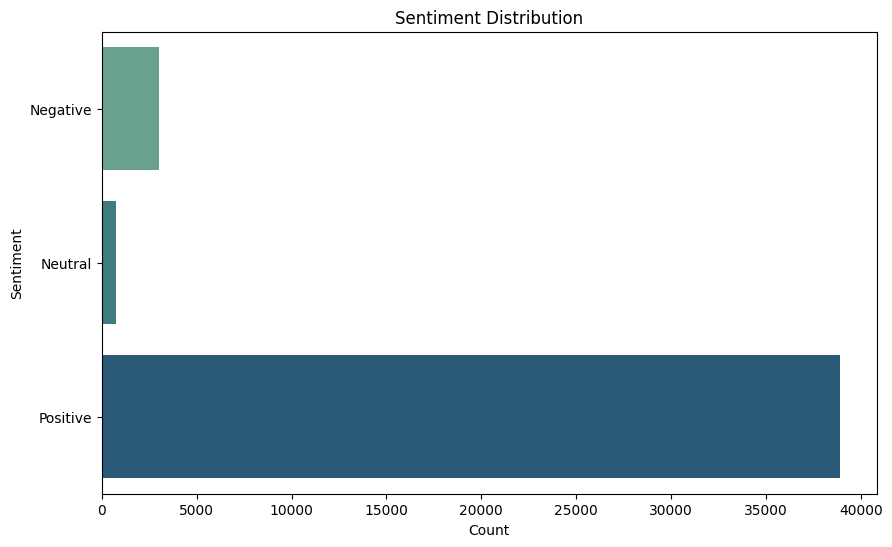

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting sentiment distribution with custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(y='Sentiment', data=df, order=['Negative', 'Neutral', 'Positive'], orient='h', palette='crest', linewidth=0.5)
plt.title('Sentiment Distribution')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.show()

 **WordClouds for Sentiment-Based Clusters**:

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word clouds for a given sentiment cluster
def generate_wordcloud(sentiment_cluster):
    # Filter DataFrame by sentiment cluster
    cluster_df = df[df['Sentiment_Cluster'] == sentiment_cluster]

    # Concatenate all lemmatized texts in the cluster
    text = ' '.join(cluster_df['Lemmatized_Text'].sum())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Sentiment-Based Cluster {sentiment_cluster}')
    plt.axis('off')
    plt.show()

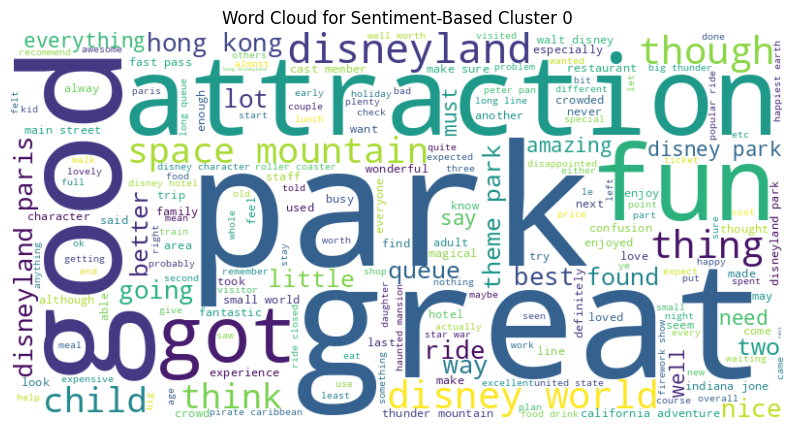

In [43]:
# Specify the sentiment cluster number
# Cluster 0 (Positive Sentiment)
cluster_number = 0

# Generate and plot word cloud for the specified sentiment cluster
generate_wordcloud(cluster_number)

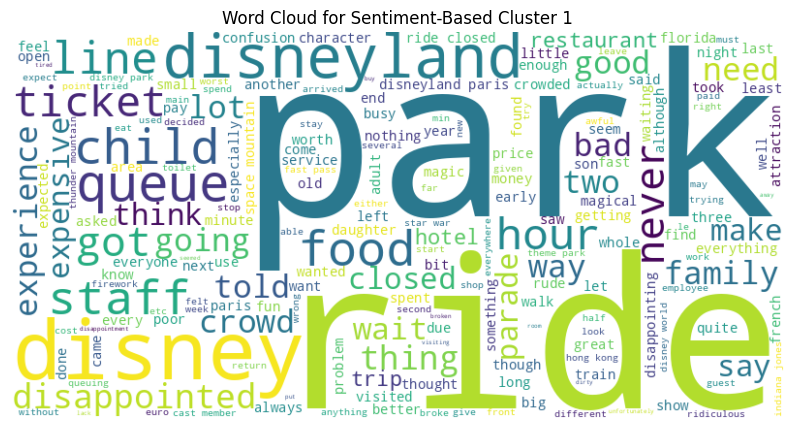

In [44]:
# Cluster 1 (Neutral Sentiment)
cluster_number = 1

# Generate and plot word cloud for the specified sentiment cluster
generate_wordcloud(cluster_number)

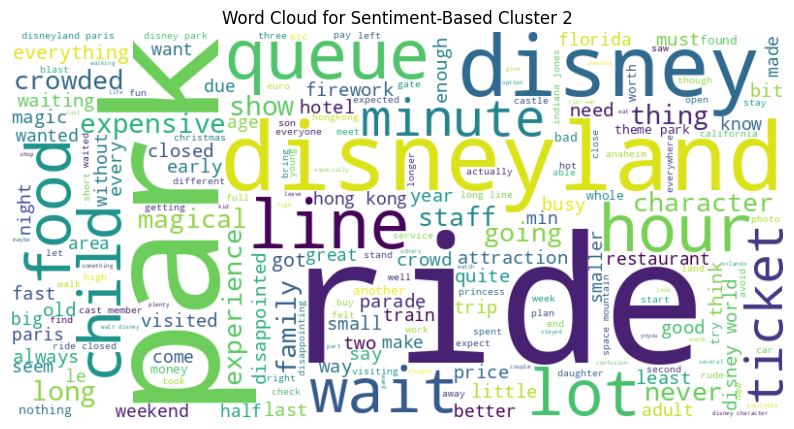

In [45]:
# Cluster 2 (Negative Sentiment)
cluster_number = 2

# Generate and plot word cloud for the specified sentiment cluster
generate_wordcloud(cluster_number)

**Sentiment Distribution across Different Branches**

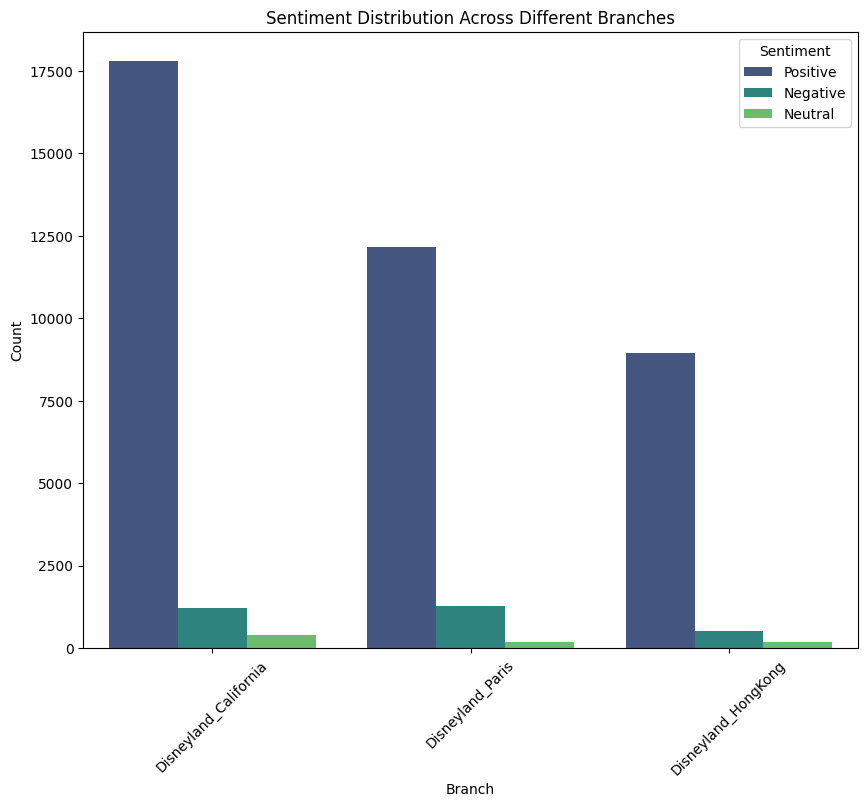

In [46]:
# Plotting sentiment distribution across different branches
plt.figure(figsize=(10, 8))
sns.countplot(x='Branch', hue='Sentiment', data=df, order=df['Branch'].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution Across Different Branches')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

**Geographic Influence on Sentiment Dynamics: Exploring Visitor Location and Sentiment Expectations Across Disneyland Branches**

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot a pie chart for a specific branch
def plot_branch_pie_chart(df, branch_name):
    branch_data = df[df['Branch'] == branch_name]
    top_10_locations = branch_data['Reviewer_Location'].value_counts().nlargest(10)

    # Generate colors using the Viridis colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_locations)))

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.pie(top_10_locations, labels=top_10_locations.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Most Frequent Reviewer Locations for {branch_name}')
    plt.axis('equal')
    plt.show()

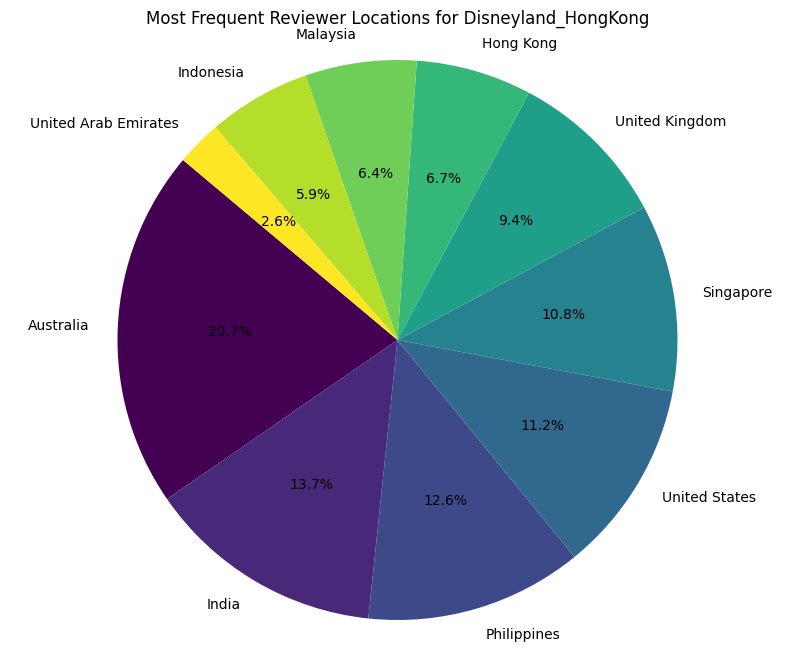

In [48]:
# Specify the Disneyland Branch
branch_name = 'Disneyland_HongKong'
plot_branch_pie_chart(df, branch_name)

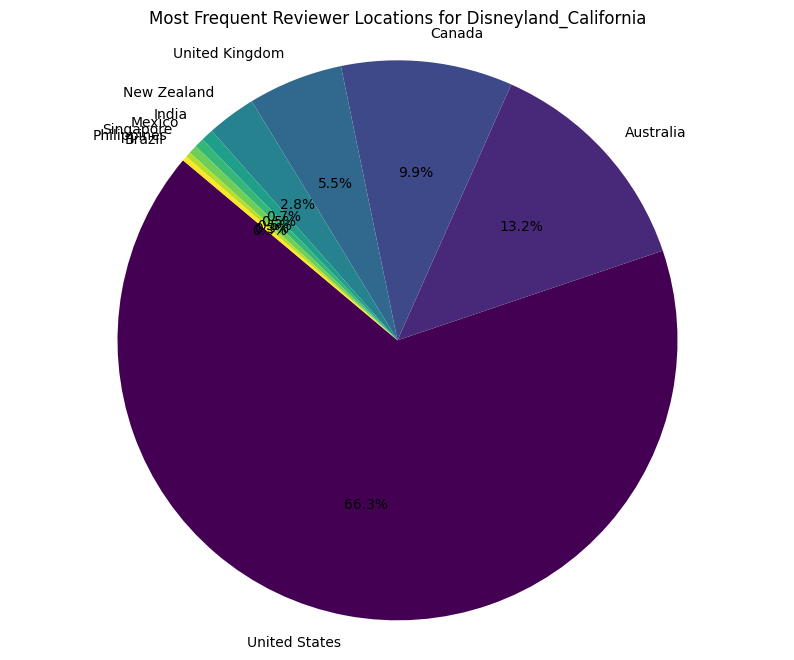

In [49]:
branch_name = 'Disneyland_California'
plot_branch_pie_chart(df, branch_name)

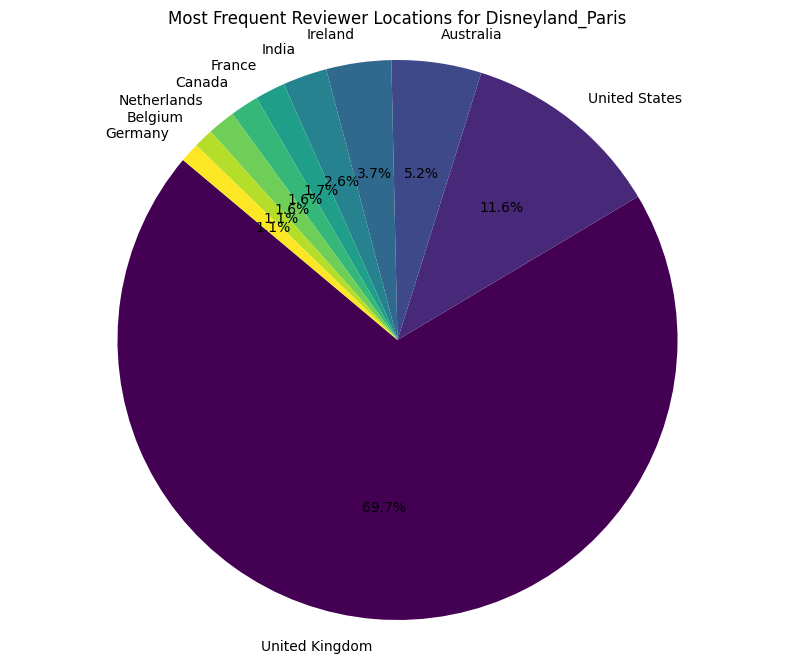

In [50]:
branch_name = 'Disneyland_Paris'
plot_branch_pie_chart(df, branch_name)

### **Named Entity Recognition**:

In [51]:
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
from nltk.chunk import tree2conlltags

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Define custom named entities for Disneyland
disneyland_entities = {
    'attractions': ['splash', 'mountain', 'space', 'haunted', 'mansion',
        'pirates', 'caribbean', 'big', 'thunder', 'it\'s', 'small', 'world',
        'jungle', 'cruise', 'matterhorn', 'bobsleds', 'indiana', 'jones', 'adventure',
        'star', 'tours', 'astro', 'orbiter', 'buzz', 'lightyear', 'carousel', 'dumbo',
        'flying', 'elephant', 'peter', 'pan', 'flight', 'mad', 'tea', 'party', 'mr.',
        'toad', 'wild', 'ride', 'storybook', 'land', 'canal', 'boats', 'finding', 'nemo',
        'submarine', 'voyage', 'autopia', 'casey', 'jr.', 'circus', 'train', 'monorail',
        'mark', 'twain', 'riverboat', 'railroad', 'tarzan', 'treehouse', 'tom', 'sawyer',
        'island', 'tiki', 'room', 'winnie', 'pooh'],
    'characters': ['mickey', 'mouse', 'donald', 'duck', 'goofy',
        'minnie', 'pluto', 'daisy', 'chip', 'dale', 'woody', 'buzz',
        'lightyear', 'ariel', 'cinderella', 'snow', 'white', 'belle',
        'jasmine', 'aladdin', 'tiana', 'pocahontas', 'mulan', 'merida',
        'rapunzel', 'elsa', 'anna', 'moana'],
    'services': ['fastpass', 'magic', 'band', 'park', 'hopper', 'ticket',
        'maxpass', 'photopass', 'disney', 'vacation', 'club', 'disneyland',
        'hotel', 'grand', 'californian', 'paradise', 'pier', 'dining',
        'plan', 'app', 'mobile', 'ordering', 'starbucks']
}

# Function to perform named entity recognition (NER) on tokens
def recognize_entities(tokens):
    # Apply part-of-speech tagging
    tagged_tokens = pos_tag(tokens)

    # Apply named entity recognition (NER)
    named_entities = ne_chunk(tagged_tokens)

    # Extract named entities
    entities = []
    for subtree in named_entities:
        if isinstance(subtree, nltk.Tree):
            extracted_entities = [token for token, pos, ner in tree2conlltags(subtree) if ner != 'O']
            domain_entities = [entity for entity in extracted_entities if entity.lower() in [item.lower() for sublist in disneyland_entities.values() for item in sublist]]
            entities.extend(domain_entities)
        else:
            entities.append(subtree[0])

    return ', '.join(entities)

# Apply NER to the 'Lemmatized_Text' column in the DataFrame
df['Named_Entities'] = df['Lemmatized_Text'].apply(lambda x: recognize_entities(word_tokenize(' '.join(x))))

# Display the named entities recognized in the DataFrame
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


,Review_ID,Rating,Year_Month,Reviewer_Location,Branch,Lemmatized_Text,Sentiment,Sentiment_Num,Sentiment_Cluster,Named_Entities
0,670772142,somewhat satisfied,2019-4,Australia,Disneyland_HongKong,"[ever, disneyland, anywhere, find, disneyland,...",Positive,2,0,"ever, disneyland, anywhere, find, disneyland, ..."
1,670682799,somewhat satisfied,2019-5,Philippines,Disneyland_HongKong,"[since, last, hongkong, disneyland, , yet, , s...",Positive,2,0,"since, last, hongkong, disneyland, yet, stay, ..."
2,670623270,somewhat satisfied,2019-4,United Arab Emirates,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",Positive,2,0,"thanks, god, hot, humid, visiting, park, other..."
3,670607911,somewhat satisfied,2019-4,Australia,Disneyland_HongKong,"[hongkong, disneyland, great, compact, park, ,...",Positive,2,0,"hongkong, disneyland, great, compact, park, un..."
4,670607296,somewhat satisfied,2019-4,United Kingdom,Disneyland_HongKong,"[location, city, , took, 1, hour, kowlon, , li...",Positive,2,0,"location, city, took, 1, hour, kowlon, like, d..."


In [56]:
import spacy
import random
from spacy.training.example import Example

# Load the spaCy English model
nlp = spacy.blank("en")

# Define the training data
TRAIN_DATA = [
    ("I loved the attractions at Disneyland California.", {"entities": [(24, 41, "LOC")]}),
    ("The food at Hong Kong Disneyland was delicious.", {"entities": [(13, 29, "LOC")]}),
]

# Split the data into train and test sets
random.shuffle(TRAIN_DATA)
train_data = TRAIN_DATA[:int(len(TRAIN_DATA) * 0.6)]
test_data = TRAIN_DATA[int(len(TRAIN_DATA) * 0.6):]

# Initialize the Named Entity Recognition (NER) model
ner = nlp.add_pipe("ner")

# Add named entity labels to the NER model
for _, annotations in train_data:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

# Disable other pipelines during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
with nlp.disable_pipes(*other_pipes):
    # Train the NER model
    optimizer = nlp.begin_training()
    for i in range(10):
        random.shuffle(train_data)
        losses = {}
        for text, annotations in train_data:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            nlp.update([example], drop=0.2, sgd=optimizer, losses=losses)
        print(losses)

{'ner': 4.666666880249977}
{'ner': 4.441977009177208}
{'ner': 4.098575070500374}
{'ner': 3.723916344344616}
{'ner': 3.2819878607988358}
{'ner': 2.820113904774189}
{'ner': 1.9687534049153328}
{'ner': 1.0438385643064976}
{'ner': 0.579708656296134}
{'ner': 0.3147161938250065}


**Loss of the Named Entity Recognition (NER) model**

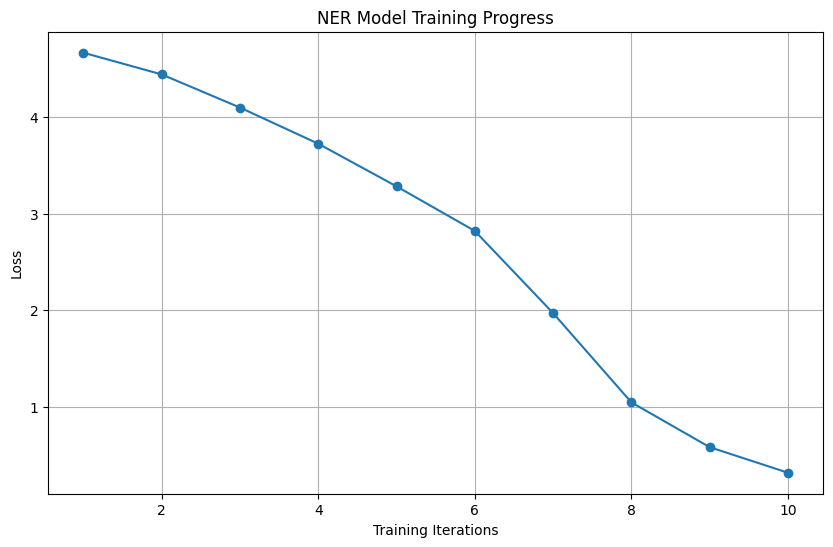

In [57]:
import matplotlib.pyplot as plt

# Loss values
loss_values = [4.666666880249977, 4.441977009177208, 4.098575070500374, 3.723916344344616, 3.2819878607988358,
               2.820113904774189, 1.9687534049153328, 1.0438385643064976, 0.579708656296134, 0.3147161938250065]

# Training iterations
iterations = range(1, len(loss_values) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss_values, marker='o', linestyle='-')
plt.title('NER Model Training Progress')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()